In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Download Titanic CSV from GitHub
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url) #creating dataframe from csv file

# Save it locally
df.to_csv("data/titanic.csv", index=False)

# View the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Previewing the data

In [4]:
df.head() #returns a specified number of rows,from the top.returns the first 5 rows if a number is not specified.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info() #Get a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe() #Generate descriptive statistics for numerical columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#Cleaning the data

In [11]:
# Fill missing age with median
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Fill missing embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
# Drop Cabin (too many missing)
df.drop(columns=['Cabin'], inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Explorotary Analysis

In [14]:
df['Sex'].value_counts() #frequency of each distinct row, gender distribution in this case

male      577
female    314
Name: Sex, dtype: int64

In [16]:
# Survival rate by gender
df.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [22]:
# Survival rate by class
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [25]:
# Crosstab of survival by gender
pd.crosstab(df['Sex'], df['Survived'], normalize='index')

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


In [ ]:
# Visualizations

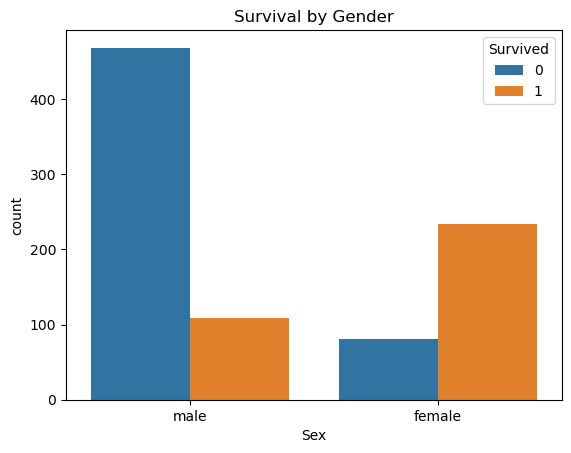

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival count by gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()

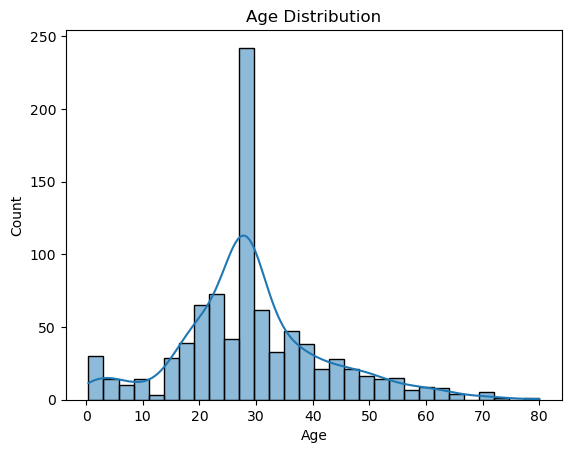

In [27]:
# Age distribution
sns.histplot(data=df, x='Age', bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

/var/folders/3f/pk30_6q93v95r37wgp7zjdb00000gn/T/ipykernel_15517/1880291018.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


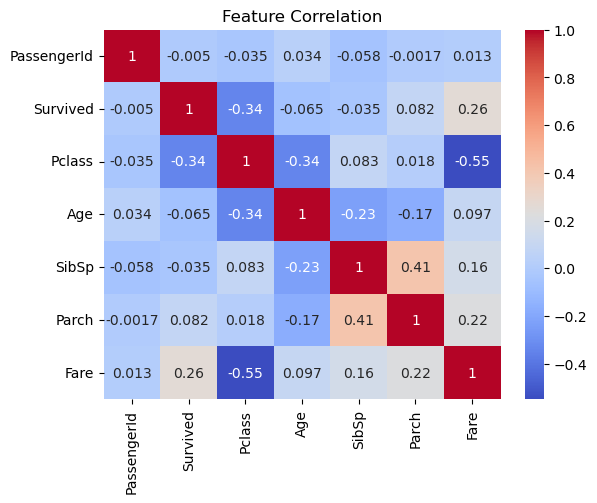

In [28]:
# Heatmap of correlation
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [ ]:
#Feature Engineering

In [32]:
# Create a new feature: FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch']
df['FamilySize']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: FamilySize, Length: 891, dtype: int64

In [33]:
# Create an Age category
df['AgeBin'] = pd.cut(df['Age'], bins=[0,12,18,35,60,80], labels=['Child','Teen','YoungAdult','Adult','Senior'])
df['AgeBin']

0      YoungAdult
1           Adult
2      YoungAdult
3      YoungAdult
4      YoungAdult
          ...    
886    YoungAdult
887    YoungAdult
888    YoungAdult
889    YoungAdult
890    YoungAdult
Name: AgeBin, Length: 891, dtype: category
Categories (5, object): ['Child' < 'Teen' < 'YoungAdult' < 'Adult' < 'Senior']

In [34]:
# Encode categorical variables
df['SexEncoded'] = df['Sex'].map({'male':0, 'female':1})
df['SexEncoded']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: SexEncoded, Length: 891, dtype: int64

In [ ]:
# Summary Outputs

In [36]:
# Survival rate by AgeBin
print(df.groupby('AgeBin')['Survived'].mean())

AgeBin
Child         0.579710
Teen          0.428571
YoungAdult    0.353271
Adult         0.400000
Senior        0.227273
Name: Survived, dtype: float64


In [38]:
# Correlation Between Age, Fare, and Survival
selected_columns=['Age','Fare','Survived']
df_subset = df[selected_columns]
df_subset.corr()

,Age,Fare,Survived
Age,1.000000,0.096688,-0.064910
Fare,0.096688,1.000000,0.257307
Survived,-0.064910,0.257307,1.000000


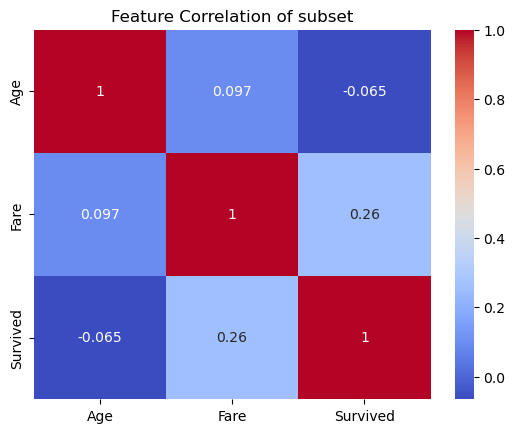

In [39]:
# Correlation Between Age, Fare, and Survival
sns.heatmap(df_subset.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation of subset")
plt.show()

In [46]:
# Relation Between Embarked and survived
Embarked_grouped = df.groupby('Embarked')['Survived'].mean()
Embarked_grouped

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

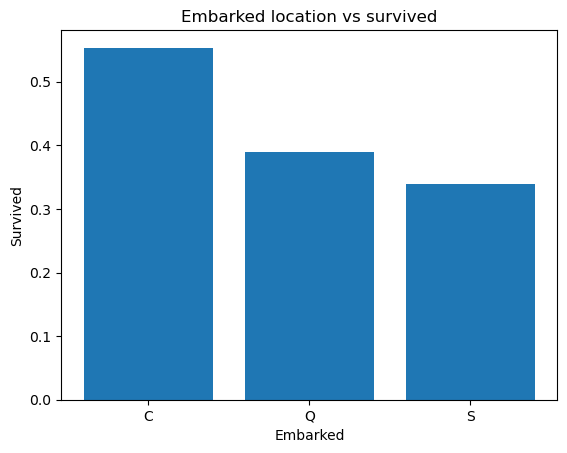

In [48]:
plt.bar(Embarked_grouped.index, Embarked_grouped)
plt.title('Embarked location vs survived')
plt.xlabel('Embarked')
plt.ylabel('Survived')
plt.show()